In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m,n = data.shape
# print(m,n)   m rows and n columns
np.random.shuffle(data) #shuffling the data

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0   #normalizing

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_, m_train = X_train.shape

In [ ]:
print(Y_train)

[7 0 6 ... 4 6 3]


Label :  4


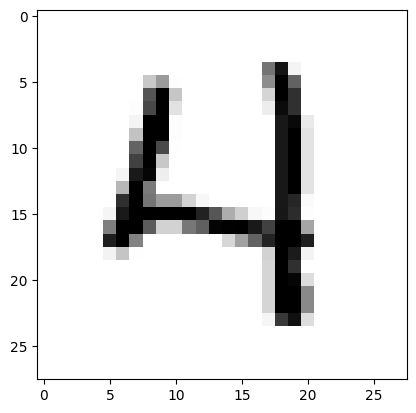

In [ ]:
all_values = data[100]
print("Label : ", all_values[0])
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [ ]:
def init_params():
  W1 = np.random.rand(128, 784) - 0.5
  b1 = np.random.rand(128, 1) - 0.5
  W2 = np.random.rand(64, 128) - 0.5
  b2 = np.random.rand(64, 1) - 0.5
  W3 = np.random.rand(10, 64) - 0.5
  b3 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2, W3, b3

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)

  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)

  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def softmax_deriv(Z):
  A = np.exp(Z) / sum(np.exp(Z)) * (1 - np.exp(Z) / sum(np.exp(Z)))
  return A

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
  one_hot_Y = one_hot(Y)
  dZ3 = A3 - one_hot_Y
  dW3 = 1 / m * dZ3.dot(A2.T)
  db3 = 1 / m * np.sum(dZ3)

  dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  W3 = W3 - alpha * dW3
  b3 = b3 - alpha * db3
  return W1, b1, W2, b2, W3, b3


In [ ]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [ ]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 600)

Iteration:  0
[1 1 6 ... 1 6 1] [3 6 4 ... 7 4 9]
0.13668185353928214
Iteration:  10
[3 1 6 ... 1 6 7] [3 6 4 ... 7 4 9]
0.4738304256028448
Iteration:  20
[3 8 6 ... 1 9 7] [3 6 4 ... 7 4 9]
0.6092899211023447
Iteration:  30
[3 8 6 ... 1 9 7] [3 6 4 ... 7 4 9]
0.6784087120791199
Iteration:  40
[3 8 6 ... 1 4 7] [3 6 4 ... 7 4 9]
0.7259695521724636
Iteration:  50
[3 8 6 ... 1 4 7] [3 6 4 ... 7 4 9]
0.7573063673741527
Iteration:  60
[3 8 6 ... 1 4 7] [3 6 4 ... 7 4 9]
0.7796421824647183
Iteration:  70
[3 8 6 ... 1 4 7] [3 6 4 ... 7 4 9]
0.796199577730859
Iteration:  80
[3 8 6 ... 2 4 7] [3 6 4 ... 7 4 9]
0.8107567507500834
Iteration:  90
[3 6 6 ... 2 4 7] [3 6 4 ... 7 4 9]
0.8220913434826091
Iteration:  100
[3 6 6 ... 2 4 9] [3 6 4 ... 7 4 9]
0.8316479608845427
Iteration:  110
[3 6 6 ... 2 4 9] [3 6 4 ... 7 4 9]
0.8407600844538282
Iteration:  120
[3 6 6 ... 2 4 9] [3 6 4 ... 7 4 9]
0.8466496277364152
Iteration:  130
[3 6 6 ... 2 4 9] [3 6 4 ... 7 4 9]
0.851650183353706
Iteration:  140
[3

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[0 3 9 1 9 4 6 1 3 2 0 5 3 2 8 7 7 0 4 5 9 0 9 4 8 0 9 2 1 9 8 0 9 5 3 3 8
 3 5 7 2 4 6 1 1 3 9 7 7 6 7 5 1 3 8 6 9 5 4 0 5 4 1 4 6 1 5 0 9 2 7 8 1 3
 6 2 2 0 1 7 8 2 3 2 7 6 6 0 0 8 4 3 5 2 0 0 8 6 3 0 5 8 9 8 3 9 6 7 8 0 0
 9 3 0 2 1 5 2 4 3 6 8 2 5 3 4 6 2 7 9 0 2 6 1 8 6 6 0 9 0 9 3 3 6 7 0 4 1
 2 2 0 6 4 2 7 7 3 3 3 4 8 3 3 6 3 2 2 4 1 1 6 7 9 3 5 1 2 3 5 5 0 6 2 6 7
 4 6 1 4 4 4 2 1 0 5 3 5 9 5 4 0 7 8 7 5 1 4 6 3 4 3 6 5 0 2 8 2 6 0 3 9 1
 9 9 6 2 6 2 6 3 4 7 9 9 6 9 1 9 5 6 1 1 7 0 7 6 6 9 3 3 9 2 1 2 7 2 1 7 2
 9 2 1 9 6 7 1 1 4 6 4 3 9 0 7 0 7 4 7 9 2 7 7 6 3 0 9 9 9 7 3 5 5 5 3 0 7
 6 1 3 4 2 1 2 5 1 2 7 4 6 5 9 2 1 7 0 6 9 6 1 0 0 8 4 3 1 6 6 7 1 7 2 6 6
 6 0 6 3 8 0 1 3 9 3 8 7 5 9 6 4 9 5 9 2 8 8 3 5 1 3 0 8 2 7 6 8 0 2 8 7 7
 0 0 7 5 9 1 6 6 0 7 4 2 8 8 6 4 4 6 3 2 7 5 4 7 3 0 6 4 2 3 4 2 7 7 8 5 0
 2 3 0 4 6 8 7 4 1 9 4 7 2 6 0 3 8 7 7 8 0 4 4 7 8 5 8 9 8 4 4 6 9 5 0 5 2
 1 5 6 2 3 4 8 5 1 1 1 7 4 8 1 5 8 0 4 1 7 3 2 1 4 9 2 1 1 4 7 9 4 0 2 1 9
 9 2 4 6 4 4 1 9 6 4 2 7 

0.891

Prediction:  [5]
Label:  8


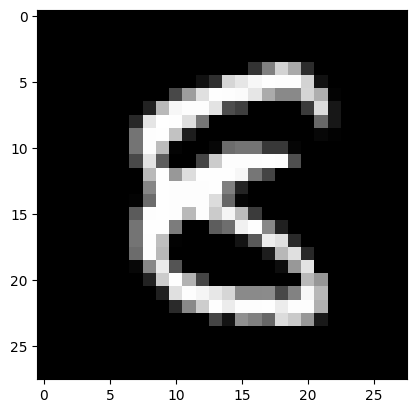

In [ ]:
test_prediction(222, W1, b1, W2, b2, W3, b3)
# test_prediction(200, W1, b1, W2, b2, W3, b3)
# test_prediction(300, W1, b1, W2, b2, W3, b3)
# test_prediction(5, W1, b1, W2, b2, W3, b3)

Prediction:  [9]
Label:  9


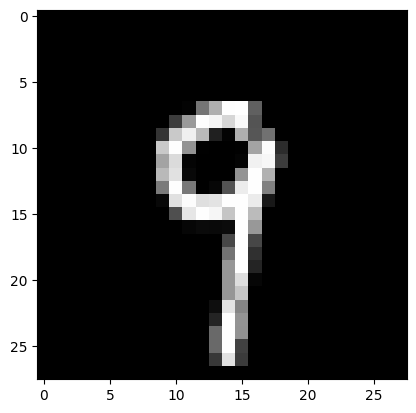

Input layer activations :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
input_layer_activations = []
layer1_activations = []
layer2_activations = []
layer3_activations = []

def forward_prop_LRP(W1, b1, W2, b2, W3, b3, X):
  input_layer_activations.append(X)
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  layer1_activations.extend([A1])

  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)
  layer2_activations.extend([A2])

  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  layer3_activations.extend([A3])
  return Z1, A1, Z2, A2, Z3, A3

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop_LRP(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

current_image = X_train[:, 221, None]
test_prediction(221, W1, b1, W2, b2, W3, b3)


# Flattening the layer0_activation list
flattened_list0 = [item for sublist in input_layer_activations for item in sublist]
layer0_act = [item for array in flattened_list0 for item in array]

# Flattening the layer1_activation list
flattened_list1 = [item for sublist in layer1_activations for item in sublist]
layer1_act = [item for array in flattened_list1 for item in array]

# Flattening the layer2_activation list
flattened_list2 = [item for sublist in layer2_activations for item in sublist]
layer2_act = [item for array in flattened_list2 for item in array]

# Flattening the layer2_activation list
flattened_list3 = [item for sublist in layer3_activations for item in sublist]
layer3_act = [item for array in flattened_list3 for item in array]

print("Input layer activations : ",layer0_act)
print("Hidden Layer 1 activations : ",layer1_act)
print("Hidden Layer 2 activations : ",layer2_act)
print("Output layer activations : ",layer3_act)


#IMPLEMENTING THE EXPLAINABILITY OF THE PREDICTION


[0.0, -2.8518411501302237, -0.2581194399304668, 0.0, 0.0, 0.0, 9.338991236637327, -2.000115115671314, -0.7737458323941238, -1.614827451863044, 0.0, 0.0, -1.105455764269543, -13.864328901673947, 0.0, 0.0, 0.0, 0.0, -0.03259411723126566, 0.0, 0.0, 0.0, 0.0, -0.2441222732085537, 0.3130581026148128, 0.0, 3.1071765074539246, 0.0, 0.0, 0.0, -2.770331501323919, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.7157779014175185, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9934080826950231, 0.0, -3.3644884779984467, 0.0, 6.413355395699189, 0.0, 0.0, 0.0, 0.0, 0.0, 8.259941939251119, 1.548272136946506, 0.09021605251422554, 1.0997811424745132]
64
[0.0, 0.0, 0.779326879606779, 0.0, 0.0, -0.05461307215713938, 2.1696515962001808, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.111778941665351, 1.2778762608323977, 0.0, -3.434665236597253, 4.776320436000412, 2.600431738642011, -6.329066589387878, 0.0, 0.0, 0.06352514053062065, 0.0, 0.45187502922548256, 1.4447991300271166, -0.3001096075304136, 0.0, -0.4307035971177929

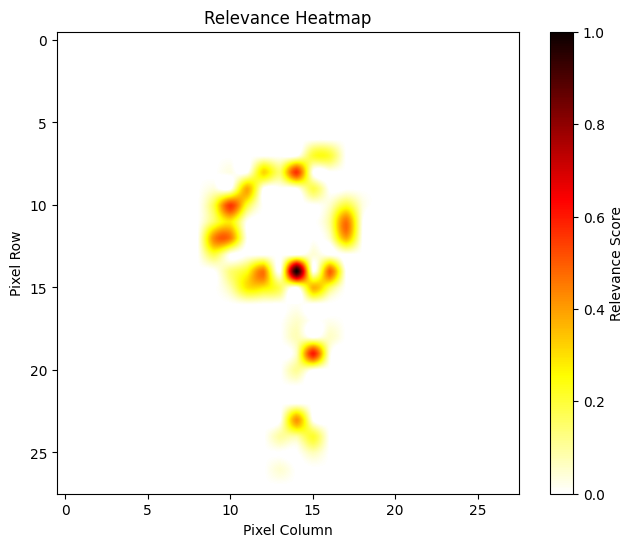

In [ ]:
layer3_relevance = layer3_act # Relevance for the output layer nodes is the model's output
layer2_relevance = []
layer1_relevance = []
layer0_relevance = []
layer_two_sum = []
layer_one_sum = []
layer_zero_sum = []

#Calculating Relevances for 2nd hidden layer
for i in range(len(layer3_relevance)):
  layer2_sum = 0
  for j in range(len(layer2_act)):
    layer2_sum += (W3[i][j] * layer2_act[j]) * layer3_relevance[i]
  layer_two_sum.append(layer2_sum)

for j in range(len(layer2_act)):
  R = 0
  for i in range(len(layer3_relevance)):
    numerator = (W3[i][j] * layer2_act[j]) * layer3_relevance[i]
    R += numerator / (layer_two_sum[i] + 1e-10)
  layer2_relevance.append(R)

print(layer2_relevance)
print(len(layer2_relevance))


#Calculating Relevances for 1st hidden layer
for i in range(len(layer2_relevance)):
  layer1_sum = 0
  for j in range(len(layer1_act)):
    layer1_sum += (W2[i][j] * layer1_act[j]) * layer2_relevance[i]
  layer_one_sum.append(layer1_sum)

for j in range(len(layer1_act)):
  R = 0
  for i in range(len(layer2_relevance)):
    numerator = (W2[i][j] * layer1_act[j]) * layer2_relevance[i]
    R += numerator / (layer_one_sum[i] + 1e-10 )
  layer1_relevance.append(R)

print(layer1_relevance)
print(len(layer1_relevance))


#Calculating Relevances for Input layer
for i in range(len(layer1_relevance)):
  layer0_sum = 0
  for j in range(len(layer0_act)):
    layer0_sum += (W1[i][j] * layer0_act[j]) * layer1_relevance[i]
  layer_zero_sum.append(layer0_sum)

for j in range(len(layer0_act)):
  R = 0
  for i in range(len(layer1_relevance)):
    numerator = (W1[i][j] * layer0_act[j]) * layer1_relevance[i]
    R += numerator / (layer_zero_sum[i] + 1e-10 )
  layer0_relevance.append(R)

print(layer0_relevance)
print(len(layer0_relevance))

# Convert layer0_relevance to a numpy array if it's not already
layer0_relevance = np.array(layer0_relevance)

# Replace negative values with 0
layer0_relevance[layer0_relevance < 0] = 0

# Scale values to be between 0 and 1
layer0_relevance = layer0_relevance / np.max(layer0_relevance)

input_layer_size = 784
layer0_relevance = layer0_relevance[:input_layer_size]
layer0_relevance = layer0_relevance.reshape((28, 28))

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(layer0_relevance, cmap='hot_r', interpolation='spline16')
plt.title('Relevance Heatmap')
plt.colorbar(label='Relevance Score')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()





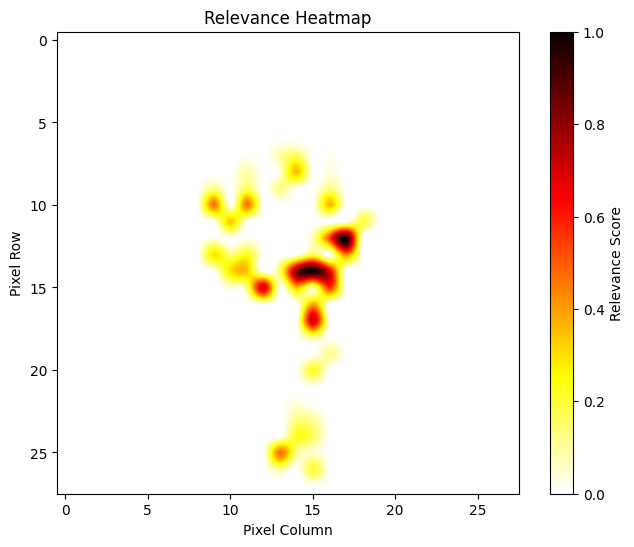

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def ReLU(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Forward propagation
def forward_prop(X, W1, b1, W2, b2, W3, b3):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    activations = (X, A1, A2, A3)
    return activations

# Get predictions
def get_predictions(A3):
    return np.argmax(A3, axis=0)

# Make predictions
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, A3 = forward_prop(X, W1, b1, W2, b2, W3, b3)
    return get_predictions(A3)

# Layer-wise Relevance Propagation with relprop function
def relprop(a, W, R, epsilon=1e-9, rho=lambda x: x):
    z = epsilon + np.dot(W, a)
    s = R / (z + epsilon)
    c = a * np.dot(W.T, s)
    return c

def LRP(activations, W1, W2, W3):
    X, A1, A2, A3 = activations

    # Initialize relevance for output layer
    R3 = A3.copy()
    R2 = np.zeros_like(A2)
    R1 = np.zeros_like(A1)
    R0 = np.zeros_like(X)

    # Backpropagate relevance from layer 3 to layer 2
    R2 = relprop(A2, W3, R3)

    # Backpropagate relevance from layer 2 to layer 1
    R1 = relprop(A1, W2, R2)

    # Backpropagate relevance from layer 1 to input layer
    R0 = relprop(X, W1, R1)

    return R0

# Normalize and plot heatmap
def plot_heatmap(relevance, input_shape=(28, 28)):
    relevance[relevance < 0] = 0
    relevance = relevance / np.max(relevance)
    relevance = relevance[:input_shape[0] * input_shape[1]]
    relevance = relevance.reshape(input_shape)

    plt.figure(figsize=(8, 6))
    plt.imshow(relevance, cmap='hot_r', interpolation='spline16')
    plt.title('Relevance Heatmap')
    plt.colorbar(label='Relevance Score')
    plt.xlabel('Pixel Column')
    plt.ylabel('Pixel Row')
    plt.show()

# Assuming modified_image is your input image and W1, b1, W2, b2, W3, b3 are your weights and biases
activations = forward_prop(X_train[:, 221, None], W1, b1, W2, b2, W3, b3)
pred = make_predictions(X_train[:, 221, None], W1, b1, W2, b2, W3, b3)
relevance = LRP(activations, W1, W2, W3)
plot_heatmap(relevance)
# print(relevance)


# Fidelity testing

Modified Prediction:  [7]
Label:  9


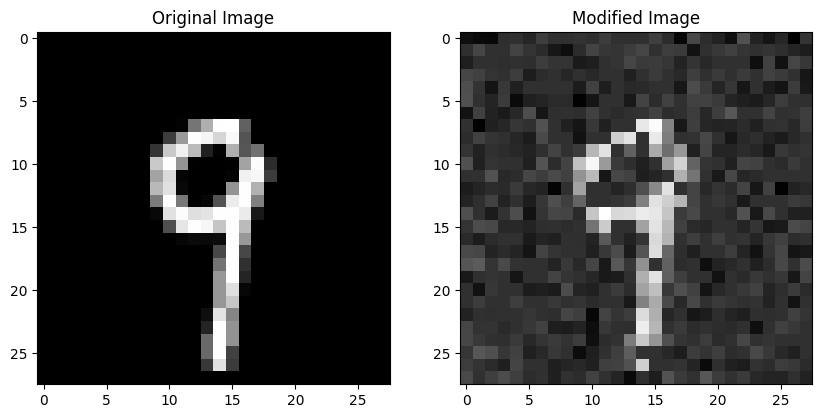

In [ ]:
# Function to add noise and zero out some pixels
def modify_image(image, noise_level, zero_fraction):
    # Add noise
    noisy_image = image + noise_level * np.random.randn(*image.shape)
    # Zero out some pixels
    num_zeros = int(zero_fraction * image.size)
    zero_indices = np.random.choice(image.size, num_zeros, replace=False)
    noisy_image.flat[zero_indices] = 0
    return noisy_image

# Modify and test prediction
def test_modified_prediction(index, W1, b1, W2, b2, W3, b3, noise_level, zero_fraction):
    original_image = X_train[:, index, None]
    modified_image = modify_image(original_image, noise_level, zero_fraction)
    # forward_prop_LRP(modified_image, W1, b1, W2, b2, W3, b3)

    prediction = make_predictions(modified_image, W1, b1, W2, b2, W3, b3)
    label = Y_train[index]

    print("Modified Prediction: ", prediction)
    print("Label: ", label)

   # Show the original and modified images side by side
    original_image_display = original_image.reshape((28, 28)) * 255
    modified_image_display = modified_image.reshape((28, 28)) * 255

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image_display, cmap='gray', interpolation='nearest')

    plt.subplot(1, 2, 2)
    plt.title("Modified Image")
    plt.imshow(modified_image_display, cmap='gray', interpolation='nearest')
    plt.show()



test_modified_prediction(221, W1, b1, W2, b2, W3, b3, noise_level=0.1, zero_fraction=0.2)
modified_image = modify_image(X_train[:, 221, None], noise_level=0.1, zero_fraction=0.2)
# # modified_image = modified_image.reshape((28, 28))
# len(modified_image)

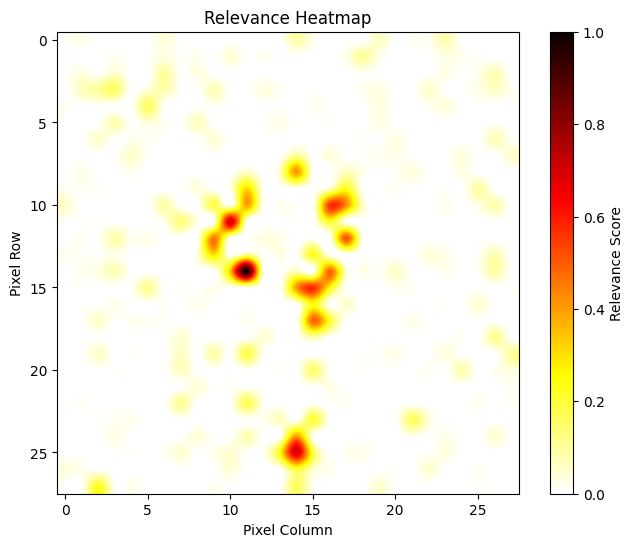

In [ ]:
# Assuming modified_image is your input image and W1, b1, W2, b2, W3, b3 are your weights and biases
activations = forward_prop(modified_image, W1, b1, W2, b2, W3, b3)
pred = make_predictions(modified_image, W1, b1, W2, b2, W3, b3)
modified_relevance = LRP(activations, W1, W2, W3)
plot_heatmap(modified_relevance)
# print(relevance)

In [ ]:
difference_relevance_values_LRP  = np.array(relevance) - np.array(modified_relevance)
# print(difference_relevance_values_LRP)

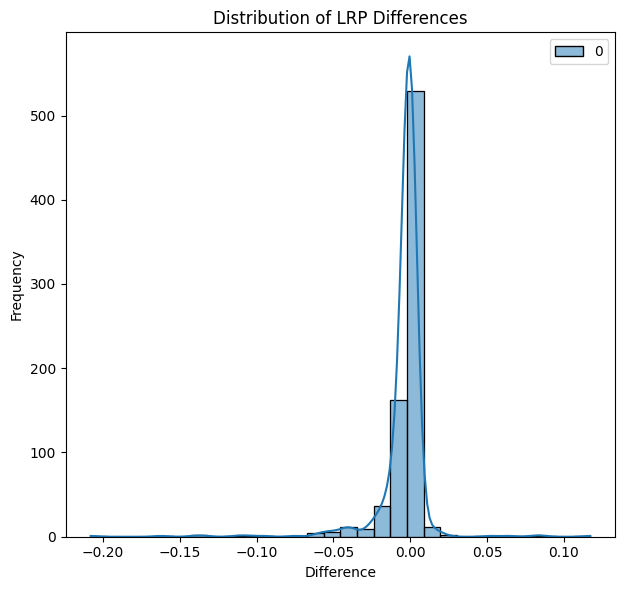

Mean value of modified LRP:  -0.004248207124720448


In [ ]:
import seaborn as sns
from scipy.stats import ttest_rel
# Visualization
plt.figure(figsize=(12, 6))
# Histogram of LRP differences
plt.subplot(1, 2, 2)
sns.histplot(difference_relevance_values_LRP, bins=30, kde=True, color='red')
plt.title('Distribution of LRP Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

mean_value_LRP = np.mean(difference_relevance_values_LRP)
print(f"Mean value of modified LRP: ",mean_value_LRP)


[0.0, 4.865689088070066e-12, 3.663155345069038e-12, 0.0, 0.0, 0.0, 2.364554821431917e-11, 1.0631941528628866e-12, -5.952850583381545e-13, 8.867777430698634e-12, 0.0, 0.0, 4.116171086000811e-12, 2.773429523097253e-12, 0.0, 0.0, 0.0, 0.0, 2.889465736096684e-13, 0.0, 0.0, 0.0, 0.0, 7.709602443062926e-12, -6.6230699394438316e-12, 0.0, -4.696284652696432e-12, 0.0, 0.0, 0.0, 4.331066436159354e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2385998426524027e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.649182128851275e-12, 0.0, -5.580305502915148e-12, 0.0, -1.618167804345812e-12, 0.0, 0.0, 0.0, 0.0, 0.0, -9.140574773337183e-12, 2.2377343823714457e-11, -8.171599879168348e-13, 1.0960000922050225e-11]
64
[0.0, 0.0, -2.2770043479801246e-24, 0.0, 0.0, 1.227283342969275e-22, -7.013533639591019e-24, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.86176804954049e-23, 2.3475427052157056e-22, 0.0, 2.4043714480431986e-22, 2.7342819860461766e-23, -5.444958248855425e-23, 3.971863148455614e-22, 0.0, 0.0, 2.5002

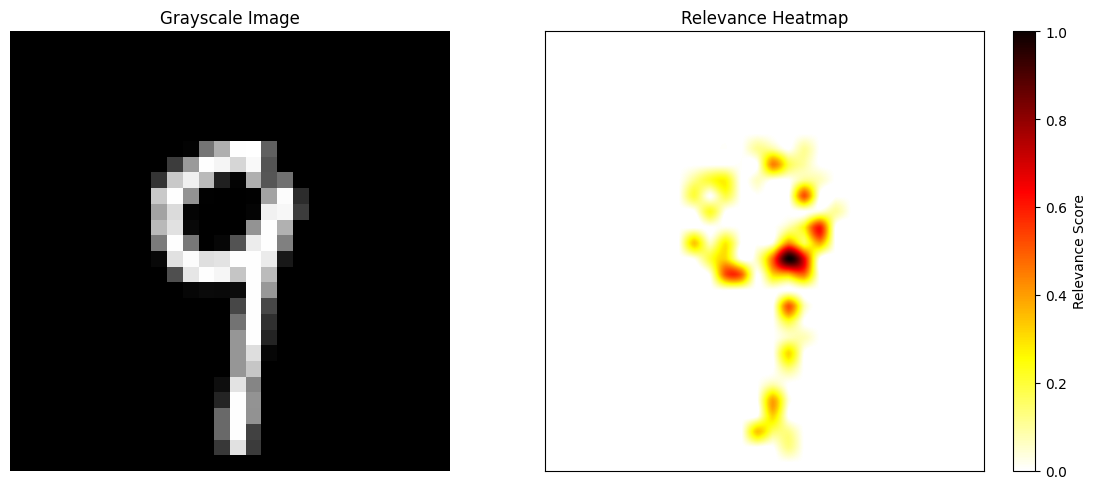

In [ ]:
## implementing epsilon LRP
layer3_relevance = layer3_act # Relevance for the output layer nodes is the model's output
layer2_relevance = []
layer1_relevance = []
layer0_relevance = []
layer_two_sum = []
layer_one_sum = []
layer_zero_sum = []
epsilon = 100
rho = 1e-9

#Calculating Relevances for 2nd hidden layer
for i in range(len(layer3_relevance)):
  layer2_sum = 0
  for j in range(len(layer2_act)):
    layer2_sum += (rho*W3[i][j] * layer2_act[j]) * layer3_relevance[i]
  layer_two_sum.append(layer2_sum)

for j in range(len(layer2_act)):
  R = 0
  for i in range(len(layer3_relevance)):
    numerator = (rho*W3[i][j] * layer2_act[j]) * layer3_relevance[i]
    R += numerator / (layer_two_sum[i] + epsilon)
  layer2_relevance.append(R)

print(layer2_relevance)
print(len(layer2_relevance))


#Calculating Relevances for 1st hidden layer
for i in range(len(layer2_relevance)):
  layer1_sum = 0
  for j in range(len(layer1_act)):
    layer1_sum += (rho*W2[i][j] * layer1_act[j]) * layer2_relevance[i]
  layer_one_sum.append(layer1_sum)

for j in range(len(layer1_act)):
  R = 0
  for i in range(len(layer2_relevance)):
    numerator = (rho*W2[i][j] * layer1_act[j]) * layer2_relevance[i]
    R += numerator / (layer_one_sum[i] + epsilon)
  layer1_relevance.append(R)

print(layer1_relevance)
print(len(layer1_relevance))


#Calculating Relevances for Input layer
for i in range(len(layer1_relevance)):
  layer0_sum = 0
  for j in range(len(layer0_act)):
    layer0_sum += (rho*W1[i][j] * layer0_act[j]) * layer1_relevance[i]
  layer_zero_sum.append(layer0_sum)

for j in range(len(layer0_act)):
  R = 0
  for i in range(len(layer1_relevance)):
    numerator = (rho*W1[i][j] * layer0_act[j]) * layer1_relevance[i]
    R += numerator / (layer_zero_sum[i] + epsilon)
  layer0_relevance.append(R)

print(layer0_relevance)
print(len(layer0_relevance))

# Convert layer0_relevance to a numpy array if it's not already
layer0_relevance = np.array(layer0_relevance)

# Replace negative values with 0
layer0_relevance[layer0_relevance < 0] = 0

# Scale values to be between 0 and 1
layer0_relevance = layer0_relevance / np.max(layer0_relevance)

input_layer_size = 784
layer0_relevance = layer0_relevance[:input_layer_size]
layer0_relevance = layer0_relevance.reshape((28, 28))

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

current_image = current_image.reshape((28, 28)) * 255

# Display the grayscale image in the first subplot
axes[0].imshow(current_image, cmap='gray', interpolation='nearest')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')  # Hide the axis

# Display the relevance heatmap in the second subplot
cax = axes[1].imshow(layer0_relevance, cmap='hot_r', interpolation='spline16')
axes[1].set_title('Relevance Heatmap')
fig.colorbar(cax, ax=axes[1], label='Relevance Score')
# Remove the axis values (ticks) from the heatmap
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()






[0.0, -2.851841066652929, -0.25811943370606905, 0.0, 0.0, 0.0, 9.338990896971152, -2.000115047190641, -0.7737458041409278, -1.6148274179202855, 0.0, 0.0, -1.105455625229073, -13.864328625430225, 0.0, 0.0, 0.0, 0.0, -0.032594115590252284, 0.0, 0.0, 0.0, 0.0, -0.24412218338900293, 0.313058051114255, 0.0, 3.107176424715859, 0.0, 0.0, 0.0, -2.7703313867974155, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.715777675586616, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9934080736921178, 0.0, -3.3644884284054584, 0.0, 6.41335513605733, 0.0, 0.0, 0.0, 0.0, 0.0, 8.259941555014905, 1.5482722051540887, 0.09021604307866218, 1.0997810655276015]
64
[0.0, 0.0, 0.7793268788279598, 0.0, 0.0, -0.05461307230712653, 2.169651594914891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1117789406869347, 1.2778762600647209, 0.0, -3.4346652302984904, 4.7763204311654475, 2.600431736416512, -6.329066583150045, 0.0, 0.0, 0.06352514064401368, 0.0, 0.451875029170092, 1.444799129154937, -0.3001096067743718, 0.0, -0.430703594568238

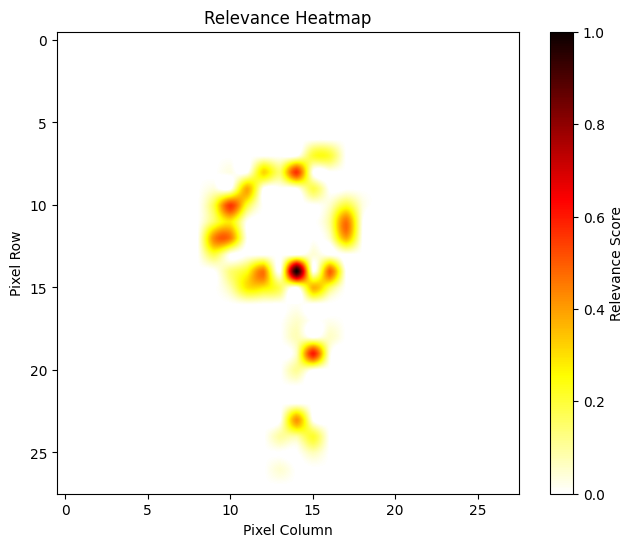

In [ ]:
##Implementing Gamma LRP
layer3_relevance = layer3_act # Relevance for the output layer nodes is the model's output
layer2_relevance = []
layer1_relevance = []
layer0_relevance = []
layer_two_sum = []
layer_one_sum = []
layer_zero_sum = []
gamma = 0.06
epsilon = 1e-10

#Calculating Relevances for 2nd hidden layer
for i in range(len(layer3_relevance)):
  layer2_sum = 0
  for j in range(len(layer2_act)):
    layer2_sum += ((W3[i][j] + gamma*W3[i][j])  * layer2_act[j]) * layer3_relevance[i]
  layer_two_sum.append(layer2_sum)

for j in range(len(layer2_act)):
  R = 0
  for i in range(len(layer3_relevance)):
    numerator = ((W3[i][j] + gamma*W3[i][j]) * layer2_act[j]) * layer3_relevance[i]
    R += numerator / (layer_two_sum[i] + epsilon)
  layer2_relevance.append(R)

print(layer2_relevance)
print(len(layer2_relevance))


#Calculating Relevances for 1st hidden layer
for i in range(len(layer2_relevance)):
  layer1_sum = 0
  for j in range(len(layer1_act)):
    layer1_sum += ((W2[i][j] + gamma*W2[i][j]) * layer1_act[j]) * layer2_relevance[i]
  layer_one_sum.append(layer1_sum)

for j in range(len(layer1_act)):
  R = 0
  for i in range(len(layer2_relevance)):
    numerator = ((W2[i][j] + gamma*W2[i][j]) * layer1_act[j]) * layer2_relevance[i]
    R += numerator / (layer_one_sum[i] + epsilon)
  layer1_relevance.append(R)

print(layer1_relevance)
print(len(layer1_relevance))


#Calculating Relevances for Input layer
for i in range(len(layer1_relevance)):
  layer0_sum = 0
  for j in range(len(layer0_act)):
    layer0_sum += ((W1[i][j] + gamma*W1[i][j]) * layer0_act[j]) * layer1_relevance[i]
  layer_zero_sum.append(layer0_sum)

for j in range(len(layer0_act)):
  R = 0
  for i in range(len(layer1_relevance)):
    numerator = ((W1[i][j] + gamma*W1[i][j]) * layer0_act[j]) * layer1_relevance[i]
    R += numerator / (layer_zero_sum[i] + epsilon )
  layer0_relevance.append(R)

print(layer0_relevance)
print(len(layer0_relevance))

# Convert layer0_relevance to a numpy array if it's not already
layer0_relevance = np.array(layer0_relevance)

# Replace negative values with 0
layer0_relevance[layer0_relevance < 0] = 0

# Scale values to be between 0 and 1
layer0_relevance = layer0_relevance / np.max(layer0_relevance)

input_layer_size = 784
layer0_relevance = layer0_relevance[:input_layer_size]
layer0_relevance = layer0_relevance.reshape((28, 28))

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(layer0_relevance, cmap='hot_r', interpolation='spline16')
plt.title('Relevance Heatmap')
plt.colorbar(label='Relevance Score')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()





Shapley value for pixel 0 : 0.0
Shapley value for pixel 1 : 0.0
Shapley value for pixel 2 : 0.0
Shapley value for pixel 3 : 0.0
Shapley value for pixel 4 : 0.0
Shapley value for pixel 5 : 0.0
Shapley value for pixel 6 : 0.0
Shapley value for pixel 7 : 0.0
Shapley value for pixel 8 : 0.0
Shapley value for pixel 9 : 0.0
Shapley value for pixel 10 : 0.0
Shapley value for pixel 11 : 0.0
Shapley value for pixel 12 : 0.0
Shapley value for pixel 13 : 0.0
Shapley value for pixel 14 : 0.0
Shapley value for pixel 15 : 0.0
Shapley value for pixel 16 : 0.0
Shapley value for pixel 17 : 0.0
Shapley value for pixel 18 : 0.0
Shapley value for pixel 19 : 0.0
Shapley value for pixel 20 : 0.0
Shapley value for pixel 21 : 0.0
Shapley value for pixel 22 : 0.0
Shapley value for pixel 23 : 0.0
Shapley value for pixel 24 : 0.0
Shapley value for pixel 25 : 0.0
Shapley value for pixel 26 : 0.0
Shapley value for pixel 27 : 0.0
Shapley value for pixel 28 : 0.0
Shapley value for pixel 29 : 0.0
Shapley value for pi

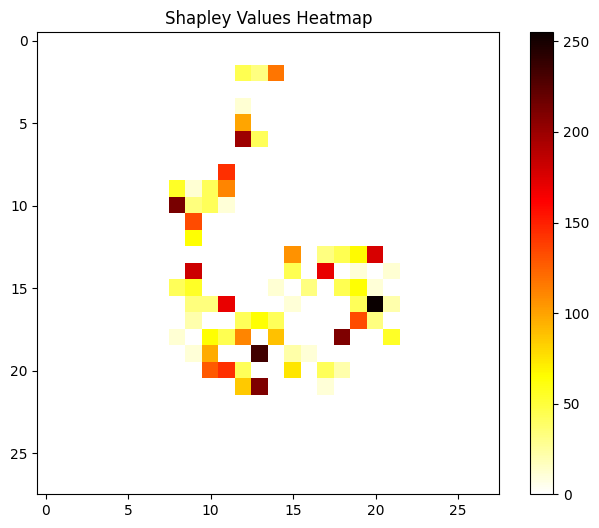

Prediction:  [6]
Label:  6


In [ ]:
from scipy.special import comb
def make_predictions_subset(X, subset, W1, b1, W2, b2, W3, b3):
    X_subset = np.copy(X)  # Create a copy of the input image
    X_subset[np.setdiff1d(np.arange(X.shape[0]), subset)] = 0  # Setting all pixels not in the subset to 0
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_subset)
    predictions = get_predictions(A3)
    return predictions

def calculate_shapley_values(X, W1, b1, W2, b2, W3, b3, num_samples=400):
    shapley_values = np.zeros(X.shape)

    for pixel_index in range(X.shape[0]):
        subset_indices_with_pixel = np.random.choice(X.shape[0], num_samples, replace=False)
        subset_indices_with_pixel = np.append(subset_indices_with_pixel, pixel_index)  # Include the current pixel
        subset_indices_with_pixel = np.unique(subset_indices_with_pixel)  # Ensure uniqueness of indices

        subset_indices_without_pixel = np.setdiff1d(subset_indices_with_pixel, pixel_index)  # Remove the current pixel

        # Calculate the size of subsets and the term ∣S∣!(∣N∣−∣S∣−1)! / ∣N∣!
        size_subset = len(subset_indices_with_pixel)
        term = comb(X.shape[0], size_subset, exact=True, repetition=False) * comb(size_subset, 1, exact=True, repetition=False)

        predictions_with_pixel = make_predictions_subset(X, subset_indices_with_pixel, W1, b1, W2, b2, W3, b3)
        predictions_without_pixel = make_predictions_subset(X, subset_indices_without_pixel, W1, b1, W2, b2, W3, b3)

        shapley_values[pixel_index] = term * (predictions_with_pixel.mean() - predictions_without_pixel.mean())

    return shapley_values


def test_prediction_shap(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index]
    shapley_values = calculate_shapley_values(current_image, W1, b1, W2, b2, W3, b3)

    shapley_values_list = []
    for pixel_index, shapley_value in enumerate(shapley_values):
        shapley_values[shapley_values < 0] = 0
        # Scale values to be between 0 and 1
        shapley_values = shapley_values / np.max(shapley_values)
        print("Shapley value for pixel", pixel_index, ":", shapley_value)
        shapley_values_list.append(shapley_value)

    # Plot heatmap of Shapley values
    plt.figure(figsize=(8, 6))
    plt.imshow(shapley_values.reshape((28, 28))*255, cmap='hot_r', interpolation='nearest')
    plt.colorbar()
    plt.title("Shapley Values Heatmap")
    plt.show()

    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)


test_prediction_shap(240, W1, b1, W2, b2, W3, b3)


In [ ]:
# # Select a set of 20 samples from the dev samples
# num_samples = 20
# selected_indices = np.random.choice(X_dev.shape[1], num_samples, replace=False)
# X_test_samples = X_dev[:, selected_indices]
# Y_test_samples = Y_dev[selected_indices]

# # Make predictions for the selected samples
# predictions = make_predictions(X_test_samples, W1, b1, W2, b2, W3, b3)

# # Save the test samples and their predictions
# np.savez('test_samples.npz', X_test_samples=X_test_samples, Y_test_samples=Y_test_samples, predictions=predictions)

# print("Test samples, labels, and predictions saved successfully.")

Test samples, labels, and predictions saved successfully.


Test samples, labels, and predictions loaded successfully.


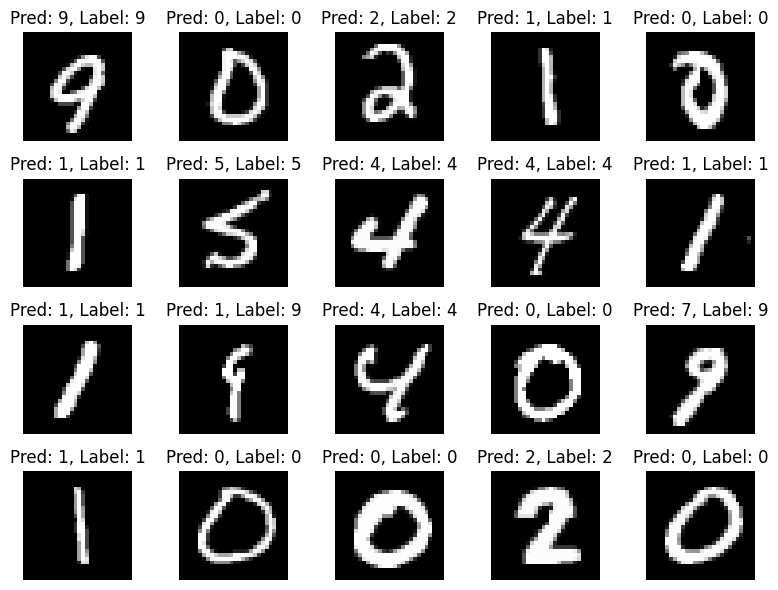

In [ ]:
# Load the saved test samples and their predictions
# data = np.load('test_samples.npz')
# X_test_samples = data['X_test_samples']
# Y_test_samples = data['Y_test_samples']
# predictions = data['predictions']

# print("Test samples, labels, and predictions loaded successfully.")

# # Display the test samples along with their predictions and true labels
# def display_predictions(X, Y, predictions, num_samples=20, rows=4, cols=5):
#     fig, axes = plt.subplots(rows, cols, figsize=(8, 6))
#     axes = axes.flatten()

#     for i in range(num_samples):
#         sample = X[:, i].reshape(28, 28)  # Reshape the flattened image
#         prediction = predictions[i]
#         label = Y[i]

#         ax = axes[i]
#         ax.imshow(sample, cmap='gray')
#         ax.set_title(f"Pred: {prediction}, Label: {label}")
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()

# # Display the saved test samples with predictions and true labels
# display_predictions(X_test_samples, Y_test_samples, predictions, num_samples=20, rows=4, cols=5)

In [ ]:
def calculate_gamma_lrp_relevance(X, W1, b1, W2, b2, W3, b3, gamma=100, epsilon=1e-10):
    # Forward pass to compute activations
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)

    # Initialize relevance scores for each layer
    layer3_relevance = A3  # Relevance for the output layer nodes is the model's output
    layer2_relevance = np.zeros_like(A2)
    layer1_relevance = np.zeros_like(A1)
    layer0_relevance = np.zeros_like(X)

    # Calculate Relevances for the 2nd hidden layer
    layer_two_sum = np.dot(W3.T * (1 + gamma), A3) + epsilon
    for i in range(W3.shape[1]):
        for j in range(W3.shape[0]):
            average_layer3_relevance = np.mean(layer3_relevance, axis=0)
            intermediate = (W3[j, i] * (1 + gamma) * A2 * average_layer3_relevance) / layer_two_sum[j, None]
            layer2_relevance += np.sum(intermediate, axis=1)[:, None]
    # Calculate Relevances for the 1st hidden layer
    layer_one_sum = np.dot(W2.T * (1 + gamma), A2) + epsilon
    for i in range(W2.shape[1]):
        for j in range(W2.shape[0]):
            # layer1_relevance[i] += (W2[j, i] * (1 + gamma) * A1[i] * layer2_relevance[j]) / layer_one_sum[j, None]
            average_layer2_relevance = np.mean(layer2_relevance, axis=0)
            intermediate = (W2[j, i] * (1 + gamma) * A1 * layer2_relevance) / layer_one_sum[j, None]
            layer1_relevance += np.sum(intermediate, axis=1)[:, None]
    # Calculate Relevances for the input layer
    layer_zero_sum = np.dot(W1.T * (1 + gamma), A1) + epsilon
    for i in range(W1.shape[1]):
        for j in range(W1.shape[0]):
            # layer0_relevance[i] += (W1[j, i] * (1 + gamma) * X[i] * layer1_relevance[j]) / layer_zero_sum[j, None]
            average_layer1_relevance = np.mean(layer1_relevance, axis=0)
            intermediate = (W1[j, i] * (1 + gamma) * X * average_layer1_relevance) / layer_zero_sum[j, None]
            layer0_relevance += np.sum(intermediate, axis=1)[:, None]
    # Replace negative values with 0 and scale between 0 and 1
    layer0_relevance[layer0_relevance < 0] = 0
    layer0_relevance = layer0_relevance / np.max(layer0_relevance)

    return layer0_relevance

In [ ]:
def display_relevance_heatmaps(X_test_samples, Y_test_samples, predictions, W1, b1, W2, b2, W3, b3, gamma=100, epsilon=1e-10, num_samples=20, rows=4, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    axes = axes.flatten()

    for idx in range(num_samples):
        X = X_test_samples[:, idx]
        label = Y_test_samples[idx]
        prediction = predictions[idx]

        relevance_map = calculate_gamma_lrp_relevance(X, W1, b1, W2, b2, W3, b3, gamma, epsilon)
        input_layer_size = 784
        relevance_map = relevance_map[:input_layer_size]
        relevance_map = relevance_map.reshape((28, 28))

        ax = axes[idx]
        ax.imshow(relevance_map, cmap='hot_r', interpolation='nearest')
        ax.set_title(f'Label: {label}, Pred: {prediction}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

ValueError: operands could not be broadcast together with shapes (128,128) (64,128) 

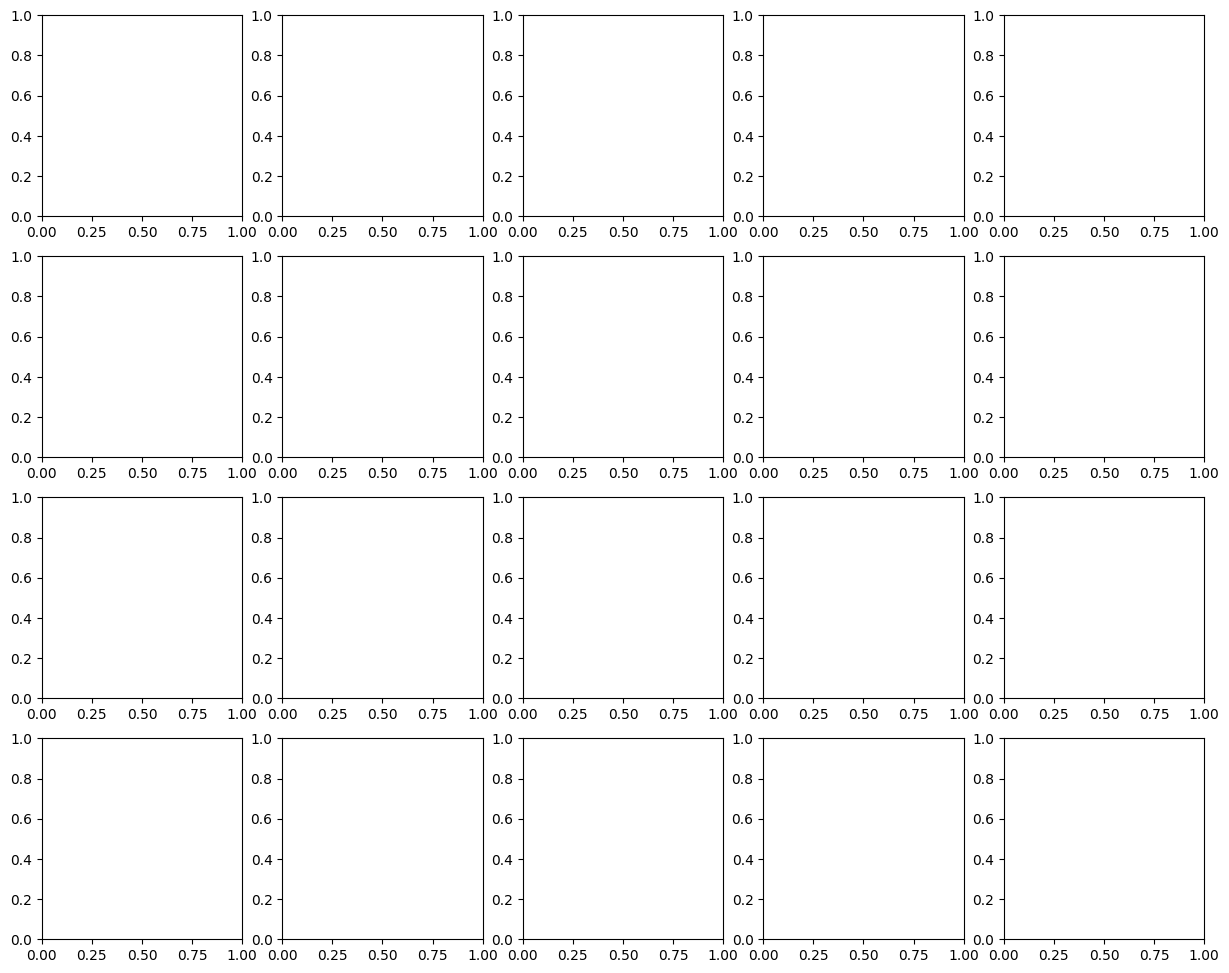

In [ ]:
display_relevance_heatmaps(X_test_samples, Y_test_samples, predictions, W1, b1, W2, b2, W3, b3, num_samples=20, rows=4, cols=5)